<a href="https://colab.research.google.com/github/Maksim2809/Old_HomeWork_Numerical_Methods/blob/main/%D1%81%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D0%BA_%D0%B4%D0%B8%D1%84%D1%83%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import scipy.stats as sp
import matplotlib.pyplot as plt

In [ ]:
50*0.1 + 200*0.0009

5.18

Уравнение: $dX(t) = (1/X(t))dt + X(t)dW(t)$

In [ ]:
def f(t,x): return 1/x
def f_x(t,x): return -1/(x**2)
def f_xx(t,x): return 2/(x**3)
def g(t,x): return x
def g_x(t,x): return 1
def g_xx(t,x): return 0

In [ ]:
def eiler(T,n,f,g, X0):
    T = 1
    n = 100
    dt = T/n
    X = [X0]
    dW = np.random.normal(0,math.sqrt(dt),n)
    ti = [i*dt for i in range(n+1)]
    s = [dW[0]]
    for i in range(1,n):
        s.append(s[i-1]+dW[i])
    for i in range(n):
        Xti1 = X[i] + f(t[i],X[i])*dt + g(t[i],X[i])*dW[i]
        X.append(Xti1)
    plt.plot(ti,X)
    plt.show()

def eiler_srav(T,n,f,g, X0,dW):
    dt = T/n
    X = [X0]
    dW = np.random.normal(0,math.sqrt(dt),n)
    ti = [i*dt for i in range(n+1)]
    for i in range(n):
        Xti1 = X[i] + f(ti[i],X[i])*dt + g(ti[i],X[i])*dW[i]
        X.append(Xti1)
    return X

def stip(T,n,X0,f,g,g_x):
    X = [X0]
    dt = [T/n for i in range(1,n)]
    t = [0] + [sum(dt[:i+1]) for i in range(n-1)]
    dW = [np.random.normal(0,math.sqrt(dt[i])) for i in range(n-1)]
    for i in range(0,n-1):
        Xt = X[i] + f(t[i],X[i])*dt[i] + g(t[i],X[i])*dW[i] + 1/2*g(t[i],X[i])*g_x(t[i],X[i])*(dW[i]**2 - dt[i])
        X.append(Xt)
    print("t: ",t)
    print("X: ",X)
    plt.plot(t,X)
    plt.show()

def runge(T,n,X0,f,g,f_x,g_x,f_xx,g_xx):
    X = [X0]
    dt = np.array([T/n for i in range(1,n)])
    t = [0] + [sum(dt[:i+1]) for i in range(n-1)]
    dW = [np.random.normal(0,math.sqrt(dt[i])) for i in range(n-1)]
    dV = [np.random.normal(0,math.sqrt(dt[i])) for i in range(n-1)]
    dZ = [1/2*dt[i]*(dW[i] + dV[i]/math.sqrt(3)) for i in range(n-1)]
    for i in range(0,n-1):
        Xt = X[i] + (f(t[i],X[i])*dt[i] + g(t[i],X[i])*dW[i]
        + 1/2*g_x(t[i],X[i])*(dW[i]**2 - dt[i])
        + f_x(t[i],X[i])*dZ[i]
        + 1/2*(f(t[i],X[i])*f_x(t[i],X[i])+1/2*f_xx(t[i],X[i])*g(t[i],X[i])**2)*dt[i]**2
        + (
            f(t[i],X[i])*g_x(t[i],X[i])
            + 1/2*g(t[i],X[i])**2 * g_xx(t[i],X[i])
            )*(dW[i]*dt[i] - dZ[i])
        + 1/2*g(t[i],X[i])*(g(t[i],X[i])*g_xx(t[i],X[i]) + g_x(t[i],X[i])**2)*(1/3*dW[i]**2 - dt[i])*dW[i])
        X.append(Xt)
    eiler_srav(T,n,f,g,X0,dW)
    plt.plot(t,X)
    plt.title('Реализация траектории')
    plt.grid()
    plt.show()


def rk_slab(T,n,X0,f,g,f_x,g_x):
    X = [X0]
    dt = np.array([T/n for i in range(1,n)])
    t = [0] + [sum(dt[:i+1]) for i in range(n-1)]
    dW = [np.random.normal(0,math.sqrt(dt[i])) for i in range(n-1)]
    for i in range(n):
        v = X[i] + f(t[i],X[i])*dt[i]+g(t[i],X[i])*dW[i]
        v1= X[i] + f(t[i],X[i])*dt[i] + g(t[i],X[i])*math.sqrt(dt[i])
        v2= X[i] + f(t[i],X[i])*dt[i] - g(t[i],X[i])*math.sqrt(dt[i])
        Xt = X[i]+(
            f(t[i],v) + f(t[i],X[i]))*dt[i] + 1/4*(
                g(t[i],v1[i])+g(t[i],v2)+2*g(t[i],X[i])
                )*dW[i] + 1/4*(
                    g(t[i],v1)+g(t[i],v2)
                    )*(dW[i]**2 - dt[i])/math.sqrt(dt[i])
        X.append(Xt)
    plt.plot(t,X,eiler_srav(T,n,f,g, X0,dW))
    plt.show()

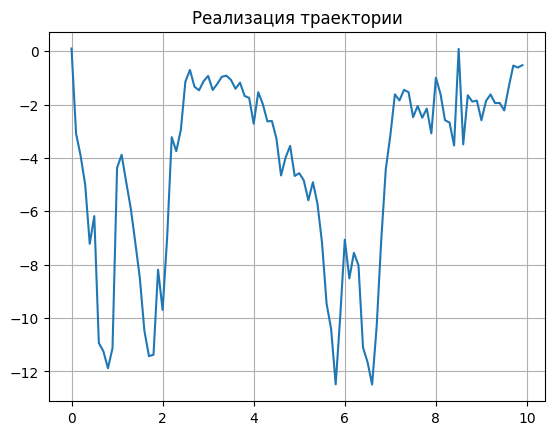

In [ ]:
T = 10 # интервал [0,T]
n = 100 # кол-во разбиений интервала
X0 = 0.4 # значение в 0

runge(10,100,0.1,f,g,f_x,g_x,f_xx,g_xx)